### We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline
print('Done installing all the module needed for this project:')

Done installing all the module needed for this project:


### Lets download the dataset

In [237]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-01-01 11:12:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.07s   

2021-01-01 11:12:18 (305 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data from the CSV file using pandas, to create Dataframe.

In [255]:
df=pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### lets print the dimension of the loaded dataset.

In [256]:
df.shape

(346, 10)

In [257]:
df['due_date']

0       10/7/2016
1       10/7/2016
2       9/22/2016
3       10/8/2016
4       10/8/2016
          ...    
341     9/25/2016
342    10/10/2016
343     9/26/2016
344    11/10/2016
345    10/11/2016
Name: due_date, Length: 346, dtype: object

### Converting to Date Time Object.

In [258]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Data Visualisation And PreProcessing.

### Checking the unique value counts of loan_status.

In [259]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

#### It seems that 260 individual have already paid off the loan, but 86 individual have gone to collection.

In [260]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [261]:
import seaborn as sns
print('Seaborn library  imported sucessfully;')

Seaborn library  imported sucessfully;


### Linspace in python create a range of number accroding to user input, where the difference between the numbers are same.

In [262]:
bins=np.linspace(df.Principal.min(),df.Principal.max(),10)
bins

array([ 300.  ,  377.78,  455.56,  533.33,  611.11,  688.89,  766.67,
        844.44,  922.22, 1000.  ])

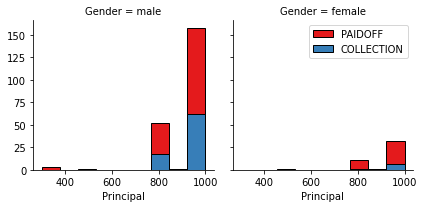

In [263]:
bins=np.linspace(df.Principal.min(),df.Principal.max(),10)
g=sns.FacetGrid(df,col='Gender',hue='loan_status',palette='Set1',col_wrap=2)
g.map(plt.hist,'Principal',bins=bins, ec='k')
g.axes[-1].legend()
plt.show()

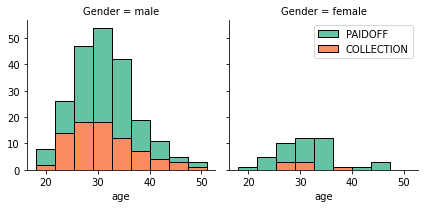

In [264]:
bins=np.linspace(df.age.min(),df.age.max(),10)
g=sns.FacetGrid(df,col='Gender',hue='loan_status',palette='Set2',col_wrap=2)
g.map(plt.hist,'age',bins=bins,ec='k')
g.axes[-1].legend()
plt.show()

# Time For Preprocessing: Feature Selection/Extraction.

### Lets check on which day of Weekend people get their loan sanctioned.

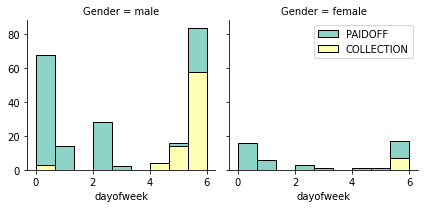

In [265]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(),df.dayofweek.max(),10)
g=sns.FacetGrid(df,col='Gender',hue='loan_status',palette='Set3', col_wrap=2)
g.map(plt.hist,'dayofweek',bins=bins,ec='k')
g.axes[-1].legend()
plt.show()

### We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4

In [266]:
df['weekend']=df['dayofweek'].apply(lambda x: 1 if(x>3) else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


### Convert Categorical features to numerical values

In [267]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=False)

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64

In [268]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

### 86% female pay there loan while 73% of male pay there loan.

### lets convert categorical value to numerical value, for example male to 0 and female to 1:

In [269]:
df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


### Lets see for eductaion.

In [270]:
df.groupby('education')['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

### Feature before Encoding.

In [271]:
df[['Principal','Gender','terms','age','education']].head()

,Principal,Gender,terms,age,education
0,1000,0,30,45,High School or Below
1,1000,1,30,33,Bechalor
2,1000,0,15,27,college
3,1000,1,30,28,college
4,1000,0,30,29,college


### Now converting the education data frame separately to each binary variables and append them in the dataframe.

In [272]:
Feature = df[['Principal','Gender','terms','age','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])],axis=1)
Feature.drop(['Master or Above'],axis=1,inplace=True)
Feature.head()

,Principal,Gender,terms,age,weekend,Bechalor,High School or Below,college
0,1000,0,30,45,0,0,1,0
1,1000,1,30,33,0,1,0,0
2,1000,0,15,27,0,0,0,1
3,1000,1,30,28,1,0,0,1
4,1000,0,30,29,1,0,0,1


In [273]:
X=Feature
X[:10]

,Principal,Gender,terms,age,weekend,Bechalor,High School or Below,college
0,1000,0,30,45,0,0,1,0
1,1000,1,30,33,0,1,0,0
2,1000,0,15,27,0,0,0,1
3,1000,1,30,28,1,0,0,1
4,1000,0,30,29,1,0,0,1
5,1000,0,30,36,1,0,0,1
6,1000,0,30,28,1,0,0,1
7,800,0,15,26,1,0,0,1
8,300,0,7,29,1,0,0,1
9,1000,0,15,39,1,0,1,0


In [274]:
Y=df['loan_status'].values
Y[:10]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

# Normalising the Data:

In [275]:
X=preprocessing.StandardScaler().fit_transform(X)
X[:10]

array([[ 0.52, -0.42,  0.92,  2.33, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  2.38,  0.92,  0.34, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.42, -0.96, -0.65, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  2.38,  0.92, -0.49,  0.83, -0.38, -0.88,  1.15],
       [ 0.52, -0.42,  0.92, -0.32,  0.83, -0.38, -0.88,  1.15],
       [ 0.52, -0.42,  0.92,  0.84,  0.83, -0.38, -0.88,  1.15],
       [ 0.52, -0.42,  0.92, -0.49,  0.83, -0.38, -0.88,  1.15],
       [-1.31, -0.42, -0.96, -0.82,  0.83, -0.38, -0.88,  1.15],
       [-5.89, -0.42, -1.96, -0.32,  0.83, -0.38, -0.88,  1.15],
       [ 0.52, -0.42, -0.96,  1.34,  0.83, -0.38,  1.14, -0.87]])

# Classification:

## Lets First Use K Nearest Neighbor(KNN)

In [276]:
from sklearn.model_selection import train_test_split
print('Done')

Done


In [277]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=4)
print('Train Set: ',X_train.shape,Y_train.shape)
print('Test Set: ',X_test.shape,Y_test.shape)

Train Set:  (242, 8) (242,)
Test Set:  (104, 8) (104,)


In [278]:
from sklearn.neighbors import KNeighborsClassifier
print('Done importing KNN algorithm')

Done importing KNN algorithm


In [279]:
# Lets define the value of K for the kNN classsification, Here i Have selecetd value of K to be 5.
k = 5
neighk6=KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)
yhat=neighk6.predict(X_test)
yhat[:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [280]:
Y_test[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [281]:
from sklearn import metrics
print('Train set Accuracy: ',metrics.accuracy_score(Y_train,neighk6.predict(X_train)))
print('Tets set Accuracy: ',metrics.accuracy_score(Y_test,neighk6.predict(X_test)))


Train set Accuracy:  0.8057851239669421
Tets set Accuracy:  0.7307692307692307


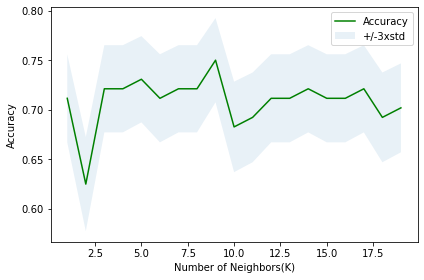

Best Accuracy: 0.75 K= 9


In [282]:
ks=20
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
ConfusionMX=[];
for i in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[i-1]=metrics.accuracy_score(Y_test,yhat)
    std_acc[i-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend(('Accuracy','+/-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors(K)')
plt.tight_layout()
plt.show()
print('Best Accuracy:',mean_acc.max(),'K=',mean_acc.argmax()+1)

# Decision Tree:

In [283]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
print("Done Importing Modules:")

Done Importing Modules:


In [284]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)
print('Done')

Done


### Modelling:

In [285]:
Tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
Tree

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [286]:
Tree.fit(X_train,Y_train)
print("Done")

Done


In [287]:
Tree

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [288]:
yhat=Tree.predict(X_test)
yhat[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [289]:
Y_test[:5]

array(['PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF'],
      dtype=object)

In [290]:
predTree=Tree.predict(X_test)
print(predTree[:10])
print(Y_test[:10])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF']


In [291]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [292]:
!conda install -c conda-forge python-graphviz -y

failed

CondaError: KeyboardInterrupt



In [293]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [295]:
from sklearn import metrics
import matplotlib.pyplot as plt
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
print('Done:')

Done:


In [296]:
print('Accuracy: ',metrics.accuracy_score(Y_test,predTree))

Accuracy:  0.6826923076923077


In [297]:
dot_data=StringIO()
Filename='Loan.png'
FeatureNames=df.columns[:8]
TargetNames=df['loan_status'].unique().tolist()
print('Done:')

Done:


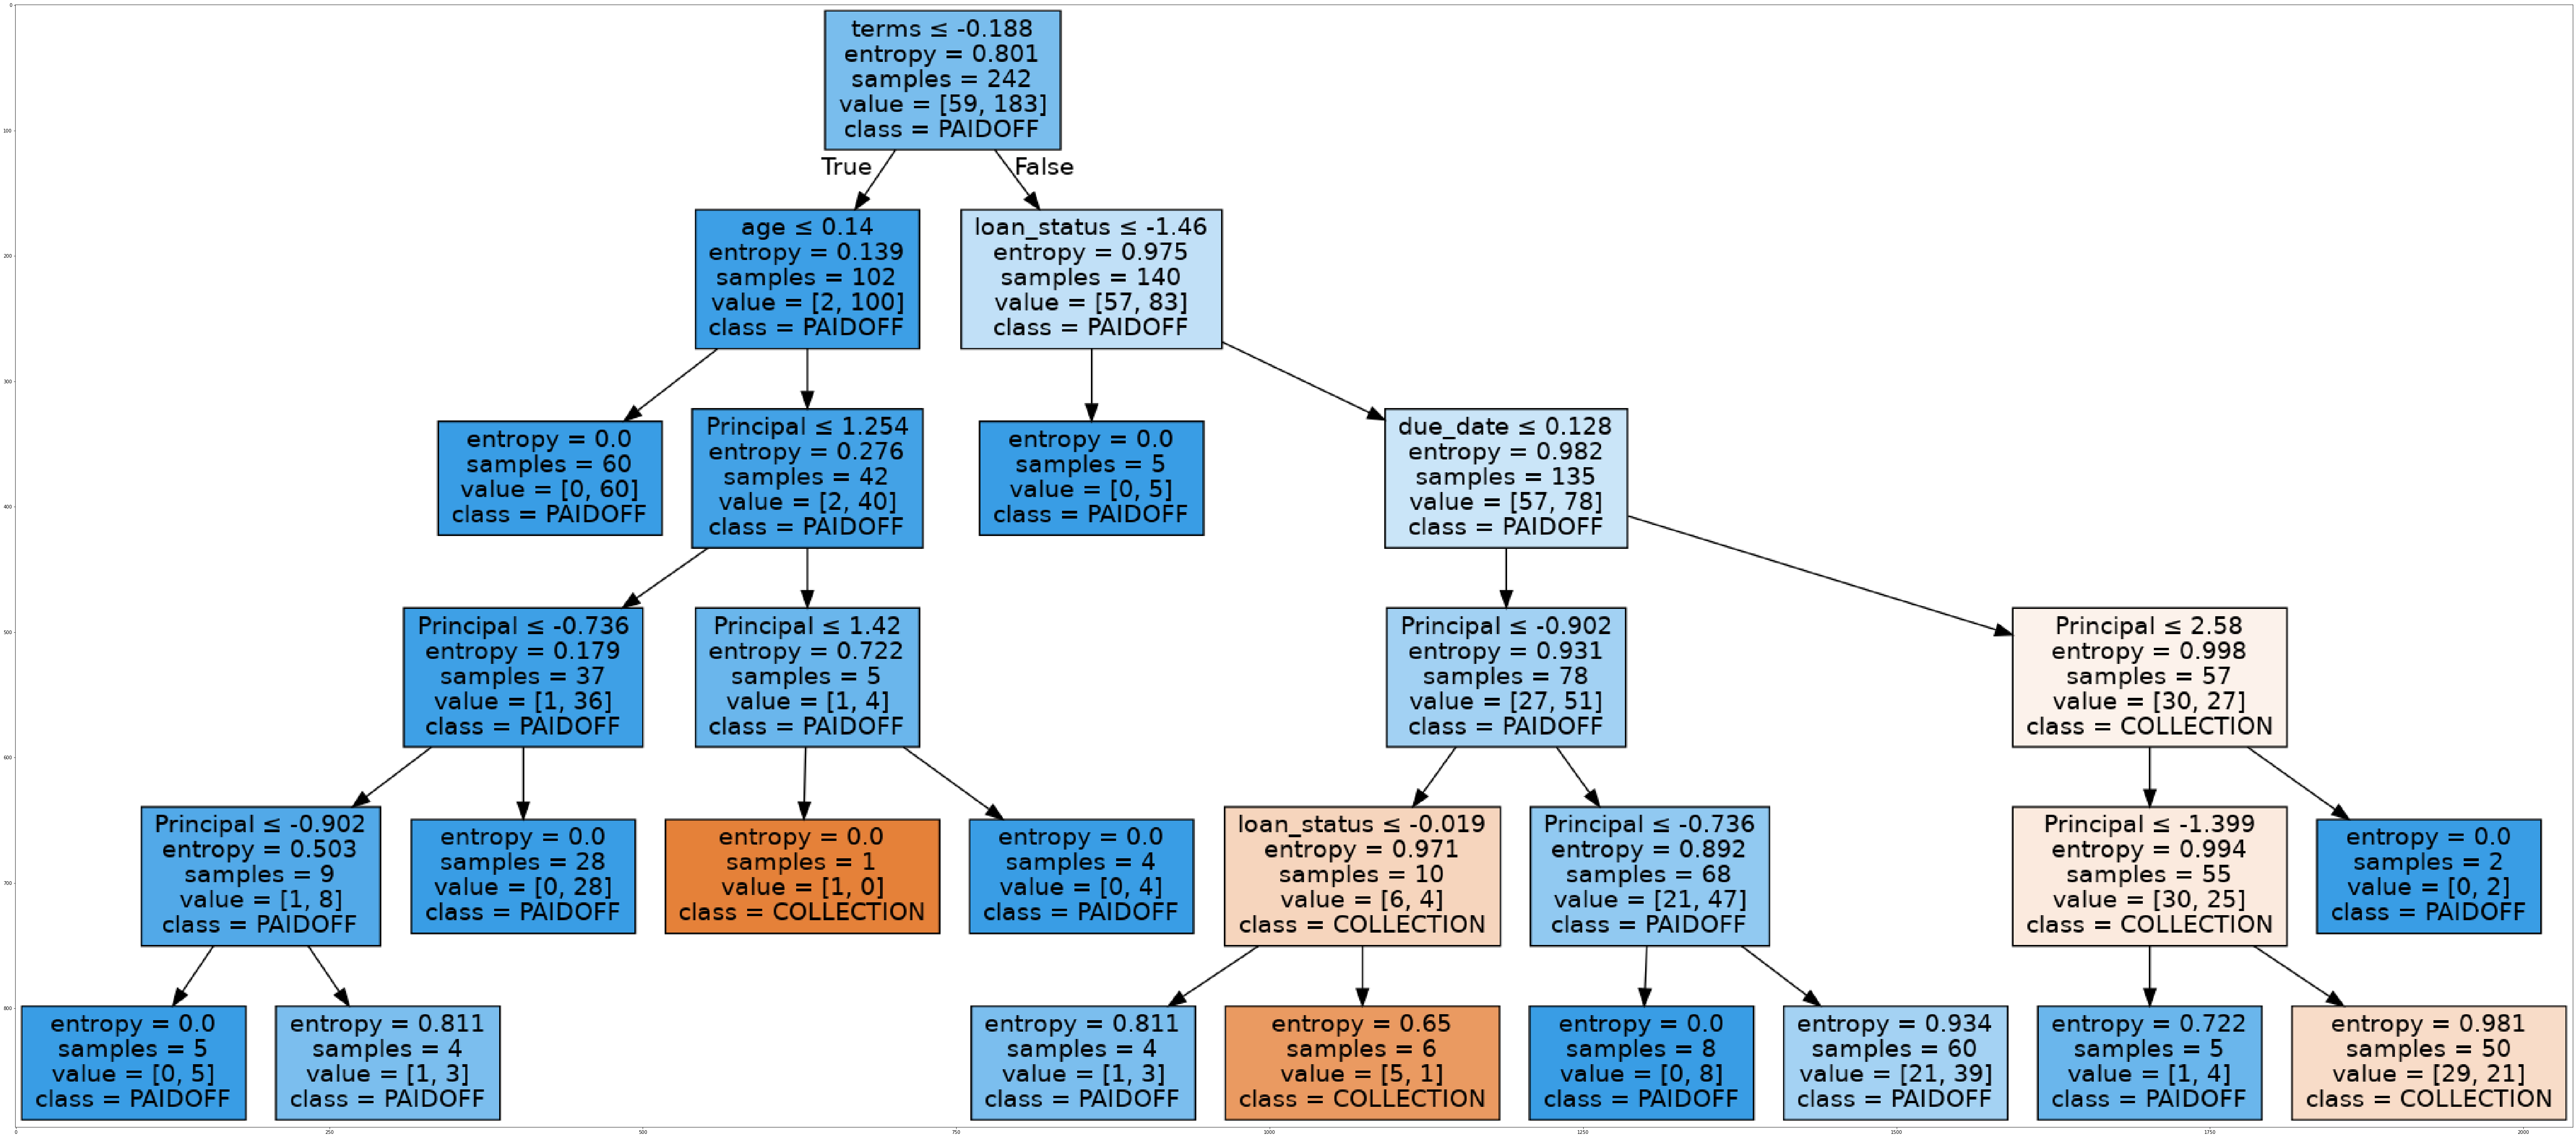

In [298]:
out=tree.export_graphviz(Tree,feature_names=FeatureNames, out_file=dot_data, class_names= np.unique(Y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(Filename)
img = mpimg.imread(Filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support vector Machine:

In [299]:
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                     int64
dayofweek                  int64
weekend                    int64
dtype: object

In [300]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0             0             0     PAIDOFF       1000     30     2016-09-08   
1             2             2     PAIDOFF       1000     30     2016-09-08   
2             3             3     PAIDOFF       1000     15     2016-09-08   
3             4             4     PAIDOFF       1000     30     2016-09-09   
4             6             6     PAIDOFF       1000     30     2016-09-09   
..          ...           ...         ...        ...    ...            ...   
341         394           394  COLLECTION        800     15     2016-09-11   
342         395           395  COLLECTION       1000     30     2016-09-11   
343         397           397  COLLECTION        800     15     2016-09-12   
344         398           398  COLLECTION       1000     30     2016-09-12   
345         399           399  COLLECTION       1000     30     2016-09-12   

      due_date  age          

In [301]:
import pandas as pd

In [302]:
df=df[pd.to_numeric(df['education'],errors='coerce').notnull()]
df['education']=df['education'].astype('int')
print(df.dtypes)

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                  int64
Gender                     int64
dayofweek                  int64
weekend                    int64
dtype: object


In [303]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)

SVC()

In [304]:
yhat=clf.predict(X_test)
yhat[:10]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [305]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
print('Done:')

Done:


In [306]:
from sklearn.metrics import jaccard_similarity_score
print('Done:')

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

              precision    recall  f1-score   support

  COLLECTION       0.44      0.30      0.36        27
     PAIDOFF       0.78      0.87      0.82        77

    accuracy                           0.72       104
   macro avg       0.61      0.58      0.59       104
weighted avg       0.69      0.72      0.70       104



ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

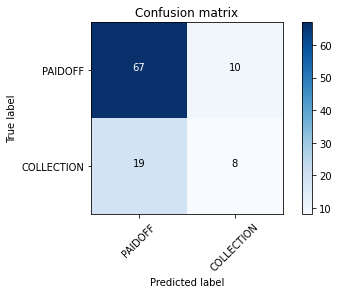

In [307]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(Y_test, yhat, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

from sklearn.metrics import f1_score
f1_score(Y_test, yhat, average='weighted')

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y_test, yhat)

# Logistics Regression:

In [308]:
df = df[['loan_status', 'Principal', 'terms', 'effective_date', 'due_date', 'age', 'education', 'Gender']]
df['loan_status'] = df['loan_status'].astype('int')
print('Done:')

Done:


In [309]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit_transform(X)
X[:5]

array([[ 0.52, -0.42,  0.92,  2.33, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  2.38,  0.92,  0.34, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.42, -0.96, -0.65, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  2.38,  0.92, -0.49,  0.83, -0.38, -0.88,  1.15],
       [ 0.52, -0.42,  0.92, -0.32,  0.83, -0.38, -0.88,  1.15]])

In [310]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)


Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LogR=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,Y_train)
LogR

LogisticRegression(C=0.01, solver='liblinear')

In [312]:
yhat=LogR.predict(X_test)
print(yhat[:10])
print(Y_test[:10])

['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [313]:
yhat_prob=LogR.predict_proba(X_test)
yhat_prob[:10]

array([[0.5 , 0.5 ],
       [0.45, 0.55],
       [0.31, 0.69],
       [0.34, 0.66],
       [0.32, 0.68],
       [0.32, 0.68],
       [0.49, 0.51],
       [0.48, 0.52],
       [0.34, 0.66],
       [0.49, 0.51]])

In [314]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


### There has been issue installing and using jaccard similarity score module in this notebook

In [315]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y_test,yhat)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [316]:
from sklearn.metrics import log_loss
log_loss(Y_test,yhat_prob)

0.5772287609479654

# Model Evaluation Using Test Set:

In [317]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
print('Done Importing')

Done Importing


### Downloadig the test set again

In [318]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-01-01 11:14:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-01-01 11:14:37 (101 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [319]:
test_set=pd.read_csv('loan_test.csv')
test_set.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [320]:
test_set.shape

(54, 10)

In [321]:
X=preprocessing.StandardScaler().fit_transform(X)
X[:10]

array([[ 0.52, -0.42,  0.92,  2.33, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  2.38,  0.92,  0.34, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.42, -0.96, -0.65, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  2.38,  0.92, -0.49,  0.83, -0.38, -0.88,  1.15],
       [ 0.52, -0.42,  0.92, -0.32,  0.83, -0.38, -0.88,  1.15],
       [ 0.52, -0.42,  0.92,  0.84,  0.83, -0.38, -0.88,  1.15],
       [ 0.52, -0.42,  0.92, -0.49,  0.83, -0.38, -0.88,  1.15],
       [-1.31, -0.42, -0.96, -0.82,  0.83, -0.38, -0.88,  1.15],
       [-5.89, -0.42, -1.96, -0.32,  0.83, -0.38, -0.88,  1.15],
       [ 0.52, -0.42, -0.96,  1.34,  0.83, -0.38,  1.14, -0.87]])

In [322]:
y=test_set['loan_status'].values
y[:10]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

### Jacard method has not been working in this version:

In [324]:
yhatKNN=neigh.predict(X)
KNNF1 = f1_score(Y, yhatKNN, average='weighted')
print("Avg F1-score of KNN Algorithm: %.2f" % KNNF1 )


yhatDEC = Tree.predict(X)
DTF1 = f1_score(Y, yhatDEC, average='weighted')
print("Avg F1-score of Decision Tree: %.2f" % DTF1 )


yhatSVM=clf.predict(X)
SVMF1 = f1_score(Y, yhatSVM, average='weighted')
print("Avg F1-score of SVM: %.2f" % SVMF1)


yhatLOG = LogR.predict(X)
yhatLOGproba = LogR.predict_proba(X)
LogRF1 = f1_score(Y, yhatLOG, average='weighted')
Logloss = log_loss(Y, yhatLOGproba)
print("LogLoss of Logistic Regression: : %.2f" % Logloss)
print("Avg F1-score of Logistic Regression: %.4f" % LogRF1)

Avg F1-score of KNN Algorithm: 0.69
Avg F1-score of Decision Tree: 0.77
Avg F1-score of SVM: 0.76
LogLoss of Logistic Regression: : 0.56
Avg F1-score of Logistic Regression: 0.7199
